# Mini-Projeto 4 - Inteligência Artificial na Agricultura

Nosso  objetivo  será  construir  um  modelo  de  IA  para  classificação  que,  ao  receber  uma imagem, vai identificar se a imagem é de uma fruta ou vegetal e indicar o nome exato da fruta ou vegetal.

In [1]:
#imports
import sklearn
import numpy as np #biblioteca para computação matemática
import tensorflow as tf  #framework para construir modelos de deep learning
import matplotlib.pyplot as plt  #gerar imagens
from pathlib import Path #coletar caminhos
from sklearn.preprocessing import LabelEncoder #fazer o encoder dos labels
from sklearn.model_selection import train_test_split  #fazer divisão nos dados
#Funções para construir e avaliar o modelo
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

In [2]:
# Seed para reprodutibilidade
tf.random.set_seed(4)

## Carregando os Dados (Imagens)

In [3]:
# Diretório atual
diretorio_atual = Path.cwd()
print(diretorio_atual)

c:\Users\bruna\Jupyter\Python_DSA_CAP12


In [4]:
#Caminho para os dados de treino
caminho_dados_treino = Path('fruits-360/Training')

In [5]:
#Caminho para os dados de teste
caminho_dados_teste = Path('fruits-360/Test')

In [6]:
# Listando o conteúdo da pasta
imagens_treino = list(caminho_dados_treino.glob("*/*"))

In [7]:
# Visualiza uma amostra da lista
imagens_treino[925:936]

[WindowsPath('fruits-360/Training/Apple Crimson Snow/r_90_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_91_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_92_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_93_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_94_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_95_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_96_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_97_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_98_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_99_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_9_100.jpg')]

In [8]:
# Expressão lambda que extrai apenas o valor com o caminho de cada imagem -- converter para uma lista
imagens_treino = list(map(lambda x: str(x), imagens_treino))

In [9]:
# Visualiza uma amostra da lista
imagens_treino[925:936]

['fruits-360\\Training\\Apple Crimson Snow\\r_90_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_91_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_92_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_93_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_94_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_95_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_96_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_97_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_98_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_99_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_9_100.jpg']

In [10]:
# Total de imagens de treino
len(imagens_treino)

67692

## Pré-Processamento dos Dados

In [11]:
# Função que obtém o label de cada imagem 
def extrai_label(caminho_imagem):
    return caminho_imagem.split("\\")[-2]

In [12]:
# Aplica a função
imagens_treino_labels = list(map(lambda x: extrai_label(x), imagens_treino))

In [13]:
# Visualiza uma amostra
imagens_treino_labels[840:846]

['Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow']

 Label encoding (convertendo string para valor numérico)

In [14]:
# Cria o objeto
encoder = LabelEncoder()

In [15]:
# Aplica o fit_transform
imagens_treino_labels = encoder.fit_transform(imagens_treino_labels)

In [16]:
# Visualiza uma amostra
imagens_treino_labels[940:946]

array([2, 2, 2, 2, 2, 2], dtype=int64)

In [17]:
# Aplicamos One-Hot-Encoding nos labels -- Tranforma os labels em vetores
imagens_treino_labels = tf.keras.utils.to_categorical(imagens_treino_labels)

In [18]:
# Visualiza uma amostra
imagens_treino_labels[940:946]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [19]:
# Dividimos os dados de treino em duas amostras: treino e validação
x_treino, x_valid, y_treino, y_valid = train_test_split(imagens_treino, imagens_treino_labels)

In [20]:
x_treino[15:18]

['fruits-360\\Training\\Cherry 2\\r_80_100.jpg',
 'fruits-360\\Training\\Mango Red\\r_263_100.jpg',
 'fruits-360\\Training\\Pepino\\236_100.jpg']

In [21]:
y_treino[15:18]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

## Dataset Augmentation

In [22]:
# Redimensionamento de todas as imagens para 224 x 224
img_size = 224
resize = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Resizing(img_size, img_size)])

In [23]:
# Cria o objeto para dataset augmentation
data_augmentation = tf.keras.Sequential([RandomFlip('horizontal'),
                                        RandomRotation(0.2),
                                        RandomZoom(height_factor = (-0.3, -0.2))])

# Preparando os Dados

In [24]:
# Hiperparâmetros -- controlar o treinamento do modelo
batch_size = 32
autotune = tf.data.experimental.AUTOTUNE

In [25]:
# Função para carregar e transformar as imagens
def carrega_transforma(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    return image, label

In [26]:
# Função para preparar os dados no formato do TensorFlow
def prepara_dataset(path, labels, train = True):
    
    # Prepara os dados
    # Organizar os dados em tensor
    image_paths = tf.convert_to_tensor(path)
    labels = tf.convert_to_tensor(labels)
    
    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)
    
    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
    dataset = dataset.map(lambda image, label: carrega_transforma(image, label))
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls = autotune)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)
    
    
    # Se train = True aplica dataset augmentation
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls = autotune)
        
        
    # Se train = False repete sobre o dataset e retorna
    dataset = dataset.repeat()
    
    
    return dataset



In [27]:
# Cria o dataset de treino
dataset_treino = prepara_dataset(x_treino, y_treino)

In [28]:
# Shape
imagem, label = next(iter(dataset_treino))  #lote de imagens
print(imagem.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Lote de 32 imagens de 224x224, com 3 canais de cores

Kaki


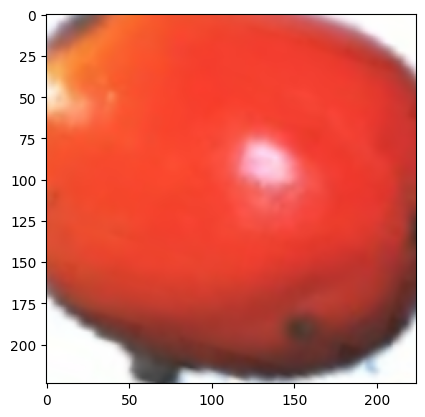

In [29]:
# Visualizar uma imagem e um label
print(encoder.inverse_transform(np.argmax(label, axis =1))[0])  # O inverso do encoder transforma em imagem
plt.imshow((imagem[0].numpy()/255).reshape(224, 224, 3))

In [30]:
# Criar dataset de validação
dataset_valida = prepara_dataset(x_valid, y_valid, train = False)

In [31]:
# Shape
imagem, label = next(iter(dataset_valida))
print(imagem.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


# Construção do Modelo

In [32]:
# Carrega um modelo pré-treinado
modelo_pre = EfficientNetB3(input_shape=(224, 224, 3), include_top= False)

In [33]:
# Adicionando nossas próprias camadas ao modelo_pre
modelo = tf.keras.Sequential([modelo_pre,
                            tf.keras.layers.GlobalAveragePooling2D(),
                            tf.keras.layers.Dense(131, activation = 'softmax')]) #131 probabilidade

In [34]:
# Sumário do modelo
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               201347    
                                                                 
Total params: 10,984,882
Trainable params: 10,897,579
Non-trainable params: 87,303
_________________________________________________________________


In [35]:
# Hiperparâmetros
lr = 0.001
beta1 = 0.9
beta2 = 0.999
ep = 1e-07

In [36]:
# Compilação do modelo
modelo.compile(optimizer = Adam(learning_rate = lr, 
                                beta_1 = beta1, 
                                beta_2 = beta2, 
                                epsilon = ep),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')])

In [37]:
%%time
history = modelo.fit(dataset_treino,
                     steps_per_epoch = len(x_treino)//batch_size,
                     epochs = 1,  # tem que experimentar a qtdd de epoca ideal
                     validation_data = dataset_valida,
                     validation_steps = len(y_treino)//batch_size)

In [2]:
# Não precisamos mais do modelo_pre
modelo.layers[0].trainable = False

NameError: name 'modelo' is not defined

In [ ]:
# Checkpoint -- para quando encontrar o modelo ideal salvar em disco
checkpoint = tf.keras.callbacks.ModelCheckpoint("modelo/melhor_modelo.h5",
                                                verbose = 1,
                                                save_best = True,
                                                save_weights_only = True)

In [ ]:
# Early stop -- se não houver melhora no treinamento ele para o modelo, por 4 épocas
early_stop = tf.keras.callbacks.EarlyStopping(patience = 4)

In [ ]:
# Sumario
modelo.summary()

In [ ]:
%%time
history = modelo.fit(dataset_treino,
                     steps_per_epoch = len(x_treino)//batch_size,
                     epochs = 6,  # tem que experimentar a qtdd de epoca ideal
                     validation_data = dataset_valida,
                     validation_steps = len(y_treino)//batch_size,
                     callbacks = [checkpoint, early_stop]) #monitorando o modelo

## Avaliação do Modelo

# Carregar os pesos, precisamos descongelar as camadas
modelo.layers[0].trainable = True

In [ ]:
# Carrega os pesos do ponto de verificação e reavalie
modelo.load_weights("modelo/melhor_modelo.h5")

        Carregamos os dados de teste

In [ ]:
# Carregando e preparando os dados de teste
caminho_imagens_teste = list(caminho_dados_teste.glob("*/*"))
imagens_teste = list(map(lambda x: str(x), caminho_imagens_teste))
imagens_teste_labels = list(map(lambda x; extrai_label(x), imagens_teste))
imagens_teste_labels = encoder.fit_transform(imagens_teste_labels)
imagens_teste_labels = tf.keras.utils.to_categorical(imagens_teste_labels)

teste_image_paths = tf.convert_to_tensor(imagens_teste)
test_image_labels = tf.convert_to_tensor(imagens_teste_labels)

In [ ]:
# Função para decode das imagens
def decode_imagens(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method = "bilinear")
    return image, label

In [ ]:
# Cria o dataset de teste
dataset_teste = (tf.data.Dataset
                .from_tensor_slices((imagens_teste, imagens_teste_labels))
                .map(decode_imagens)
                .batch(batch_size))

In [ ]:
# Shape
imagem, label = next(iter(dataset_teste))
print(imagem.shape)
print(label.shape)

In [ ]:
# Visualizar uma imagem de teste
print(encoder.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((imagem[0].numpy()/255).reshape(224, 224, 3))

In [ ]:
# Avalia o modelo
loss, acc, prec, rec = modelo.evaluate(dataset_teste)

In [ ]:
print("Acurácia: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)